# Extract informations from Muh5 files
® *Copyright Bimea 2024-2025*



In [1]:
import numpy as np
from megamicros.muh5 import MuH5
from megamicros.log import log

# set log level to INFO to get some informations (available levels are DEBUG, INFO, WARNING, ERROR, FATAL)
log.setLevel( "INFO" )

# file = MuH5("/Users/brunogas/Documents/Dev/Bimea/megamicros-libcc/build/muh5-20251107-122115.h5")
file = MuH5("/Users/brunogas/Documents/Dev/Bimea/megamicros-libcc/build/muh5-20251107-123126.h5")

print("sampling rate:", file.sampling_frequency)
print("MEMS number:", file.mems_number)
print("channels number:", file.channels_number)
print("duration:", file.duration)
print("samples number:", file.samples_number)
print("available MEMS:", file.available_mems)
# print("info: ", file.info)
print("video available: ", file.video_available)
print("video adaptive fps: ", file.video_adaptive_fps)
print("video max fps: ", file.video_max_fps)
print("video dataset count: ", file.video_dataset_count)
print("video frame count: ", file.video_frame_count)

frames = file.get_video_frames( start_frame=0, end_frame=10 )



2025-11-07 14:46:13,642 [INFO]:  .This muh5 file contains a video: 34 frames found
2025-11-07 14:46:13,642 [INFO]:  .Created MuH5 object from /Users/brunogas/Documents/Dev/Bimea/megamicros-libcc/build/muh5-20251107-123126.h5 file 


sampling rate: 20000.0
MEMS number: 32
channels number: 33
duration: 5
samples number: 100000
available MEMS: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]
video available:  True
video adaptive fps:  [ 0 10 10  2  1 50]
video max fps:  8
video dataset count:  6
video frame count:  34


## Display the frames

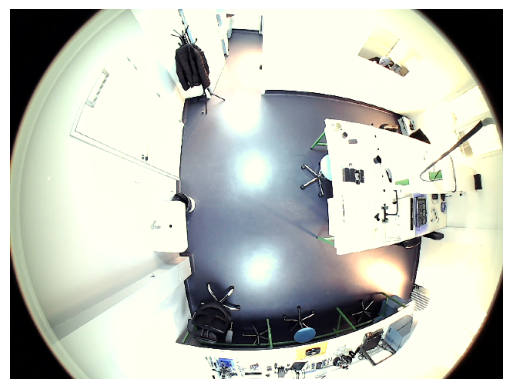

In [2]:
# Display the first frame
first_frame = file.get_video_frames(0, 0)  
import matplotlib.pyplot as plt

plt.imshow(first_frame[0])
plt.axis('off')
plt.show()

## Build a video of all frames

In [ ]:
# Build a video of all frames
# Install opencv: pip install opencv-python
import cv2

video_out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), 30, (640, 480))

frames = file.get_video_frames()
for i in range(len(frames)):
    video_out.write(frames[i])

video_out.release()

# show the video:
cap = cv2.VideoCapture('output.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow('Frame', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break